In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import random
import pandas as pd
import matplotlib 
import math

matplotlib.rcParams['figure.figsize'] = (16, 16)

In [2]:
def binomial_pdf(x, theta):
    const = math.factorial(N) / (math.factorial(x) * math.factorial(N - x))
    return const * theta**x * (1-theta)**(N-x)

In [3]:
params = [
            {"pi": 0.3, "theta": 0.8},
            {"pi": 0.5, "theta": 0.5},
            {"pi": 0.2, "theta": 0.6}
        ]

In [4]:
total_toss = 900
num_cluster = len(params)

In [5]:
Z = [np.random.choice(num_cluster, 1, p=[params[i]['pi'] for i in range(num_cluster)])[0] for toss in range(total_toss)]

In [6]:
N = 20
X = [(np.random.binomial(N, params[r]['theta'], 1))[0] for r in Z]

In [7]:
random_Z = [np.random.choice(num_cluster, 1, p=[1/num_cluster for i in range(num_cluster)])[0] for toss in range(total_toss)] 

In [8]:
def sample_theta(data, N, alpha=0.5, beta=0.5):
    n = len(data)
    total_data = n*N
    total_success = np.sum(data)
    theta = np.random.beta(total_success + alpha, total_data - total_success + beta, 1)[0]
    return theta

In [9]:
def generate_cluster(X, x_i, random_Z):
    clusters = {}
    for k in range(0, num_cluster):
        clusters[k] = []

    for (x, z_i) in zip(X, random_Z):
        if x == x_i:
            continue
        clusters[z_i].append(x)
    return clusters

In [10]:
def calc_prob(x, X, random_Z, random_Z_count):
    clusters = generate_cluster(X, x, random_Z)

    prob = []
    
    for k in range(num_cluster):
        theta = sample_theta(clusters[k], N)
        prob_k = binomial_pdf(x, theta)
        pr = ((random_Z_count[k] + A/num_cluster) / (A - 1 + len(X))) * prob_k
        
        prob.append(pr)
    return prob

In [11]:
import math
A =0.1 

total_likelihood = []

for _ in range(50):
    random_Z_count = Counter(random_Z)
    
    data_likelihood = []
    for i, (x, z) in enumerate(zip(X, random_Z)):
        prob = calc_prob(x, X, random_Z, random_Z_count)

        norm_prob = [p/np.sum(prob) for p in prob]
        random_Z[i] = np.random.choice(num_cluster, 1, p=norm_prob)[0]

        data_likelihood.append(np.log(np.sum(prob)))
    
    total_likelihood.append(np.sum(data_likelihood))

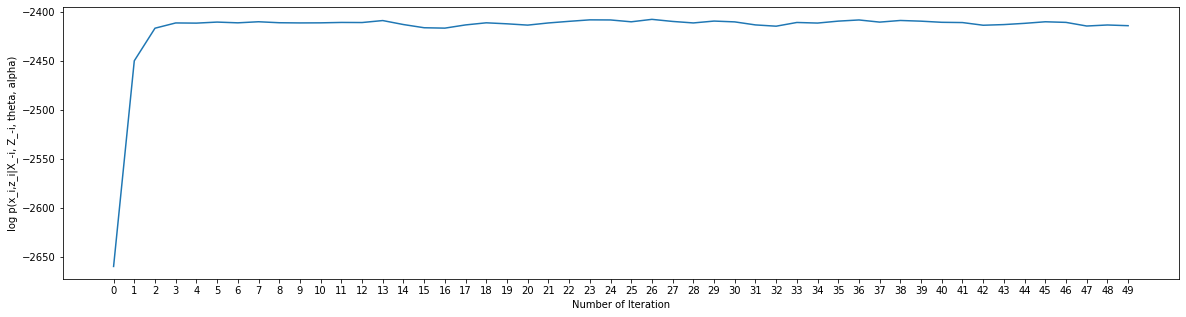

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(total_likelihood)
plt.xlabel("Number of Iteration")
plt.ylabel("log p(x_i,z_i|X_-i, Z_-i, theta, alpha)")
plt.xticks([i for i in range(50)])

plt.show()